<a href="https://colab.research.google.com/github/felipelabs/data_science/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil e no Mundo.

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito da COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados desse dataset foram criados pela [Our World in Data]("https://ourworldindata.org/"), onde eles disponibilizaram o mesmo neste [repositório]("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv") no github.

Por ser uma doença nova e seu avanço no mundo ser muito rapido, a **Covid-19** infectou o mundo todo e com isso foi gerado muitos dados que com isso optamos em usar uma fonte de dados confiavel.
Para que essa análise pudesse ser feita foi necessário utilizar dados de uma fonte confiável, e por isso optamos pela **Our World In Data**
onde seu dataset é atualizado todos os dias.


### Dicionário de Variáveis



*   **iso_code:** Código dos países.
*   **continent:** Continente.
*   **location:** Localização
*   **date:** Data
*   **total_cases:** Total de casos
*   **new_cases:** Novos casos
*   **total_deaths:** Total de mortes
*   **new_deaths:** Novas mortes
*  **total_cases_per_million:** Total de confirmados casoss da COVID-19 por 1,000,000 pessoas.
*   **new_cases_per_million:** Novos casos confirmados da COVID-19 por 1,000,000 pessoas.
* **total_deaths_per_million:** Total de mortes atribuidas da COVID-19 por 1,000,000 pessoas.
* **new_deaths_per_million:** Novas mortes atribuidas da COVID-19 por 1,000,000 pessoas.
*   **total_test:** Total de teste para a covid-19.
*   **new_test:** Novos testes para a covid-19.
*   **new_tests_smoothed:** Novos testes da COVID-19 em países que não relatam dados.

* **total_tests_per_thousand:** Total de testes da COVID-19 por 1,000 pessoas.
*   **new_tests_per_thousand:** Novos testes da COVID-19 por 1,000 pessoas.
*   **new_tests_smoothed_per_thousand:** Novos testes da COVID-19 (	7 dias suavizados) por 1.000 pessoas.
*   **tests_units:** Unidades usadas para testes.
*   **stringency_index:** Resposta do governo
Media composta com base em 9 indicadores de resposta.
*   **population:** População em 2020.
*   **population_density**: Numero de pessoas divididas por área terreste.
*   **median_age:** Media de idade.
*   **aged_65_older:** Pessoas com 65 anos de idade ou mais.
*   **aged_70_older:** Porcentagem da população com 70 anos ou mais em 2015
*   **gdp_per_capita:** PIB – Produto Interno Bruto


*   **extreme_poverty:** Porcentagem de pessoas que vivem em extrema pobreza.
*   **cvd_death_rate:** Taxa de mortalidade por doenças cardiovasculares em 2017
* **diabetes_prevalence:** Prevalência de diabetes(% população entre 20 e 70 anos ) em 2017
*   **female_smokers:** Numero de mulheres fumantes.
*   **male_smokers:** Numeros de homens fumantes.
* **handwashing_facilities:** Proporção da população com instalações basicas de lavagem de mãos.
*   **hospital_beds_per_thousand:** Camas de hospitais por 1.000 pessoas.


*   **life_expectancy:** Expecitativa de vida no ano de nascimento em 2019.



































### Importando os dados da COVID-19

In [3]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')


# importar o dataset COVID-19 para um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [94]:
#Verificando as primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
#Analisando o tamanho do dataset

print(f"O dataset contém {df.shape[0]} linhas.")
print(f"O dataset contém {df.shape[1]} colunas.")

Com isso podemos ver que é um dataset extenso que pode ter muitos dados faltantes, com isso vamo checar se possui dados ausentes ou nulos.

In [ ]:
#Verificando dados ausentes

((df.isnull().sum() / df.shape[0])* 100).value_counts(ascending=False)

In [ ]:
#Olhando o nome das colunas
df.columns

In [ ]:
#Tipos de variáveis

df.dtypes

Podemos observar que a coluna ***date*** ela está no tipo **object**, então temos que transforma-lá para datetime

In [4]:
#transformando date para datetime

df.date = pd.to_datetime(df.date)

Agora vamo ver a quantidade de mortes e infectados mais recentes.

In [5]:
#Verificando o final do dataset para pegar a ultima data.
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24942,OWID_WRL,NaN,World,2020-06-17,8141722.0,141305.0,445380.0,6851.0,1044.507,18.128,57.138,0.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24943,OWID_WRL,NaN,World,2020-06-18,8318148.0,176426.0,450630.0,5250.0,1067.141,22.634,57.812,0.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24944,OWID_WRL,NaN,World,2020-06-19,8456815.0,138667.0,456956.0,6326.0,1084.931,17.790,58.623,0.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24945,OWID_WRL,NaN,World,2020-06-20,8634087.0,177272.0,461982.0,5026.0,1107.673,22.742,59.268,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24946,OWID_WRL,NaN,World,2020-06-21,8795672.0,161585.0,466189.0,4207.0,1128.403,20.730,59.808,0.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


Na celula abaixo vamos vamos selecionar a data mais recente para total de casos e total de mortes.

In [6]:
df.loc[df.date == '2020-06-21'].sort_values(by="total_cases", ascending=False)
df.loc[df.date == '2020-06-21'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24946,OWID_WRL,NaN,World,2020-06-21,8795672.0,161585.0,466189.0,4207.0,1128.403,20.730,59.808,0.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
23896,USA,North America,United States,2020-06-21,2255119.0,34158.0,119719.0,607.0,6812.994,103.196,361.686,1.834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3432,BRA,South America,Brazil,2020-06-21,1067579.0,34666.0,49976.0,1022.0,5022.497,163.089,235.115,4.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
23722,GBR,Europe,United Kingdom,2020-06-21,303110.0,1295.0,42589.0,128.0,4464.985,19.076,627.361,1.886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
11815,ITA,Europe,Italy,2020-06-21,238275.0,264.0,34610.0,49.0,3940.916,4.366,572.427,0.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20177,SYC,Africa,Seychelles,2020-06-21,11.0,0.0,0.0,0.0,111.857,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98340,208.354,36.2,8.606,5.586,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40
8349,PYF,Oceania,French Polynesia,2020-06-21,60.0,0.0,0.0,0.0,213.596,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280904,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66
7906,FJI,Oceania,Fiji,2020-06-21,18.0,0.0,0.0,0.0,20.079,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896444,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300,67.44
7812,FLK,South America,Falkland Islands,2020-06-21,13.0,0.0,0.0,0.0,3732.415,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44


Vamos plotar um grafico para saber quais são os países com mais casos.

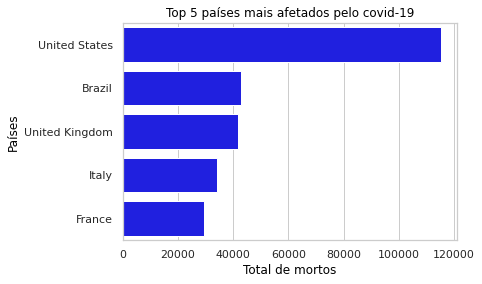

In [37]:
#Criando um novo dataframe com as variaveis
df_top5 = df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

#plotando o grafico

sns.set_style("whitegrid")
sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)

covid = sns.barplot(x="total_deaths", y="location", data=df_top5, color="blue")
covid.axes.set_title("Top 5 países mais afetados pelo covid-19", size = 12, color="black")
covid.set_xlabel("Total de mortos", size = 12, color="black")
covid.set_ylabel("Países", size = 12, color="black")

plt.show()

podemos ver que os **EUA** lidera disparadamente com quase 120.000 mortos, em seguida vem o **Brasil** com um pouco mais 40.000 mortos.

vamos plotar um grafico de linha para saber a evolução das mortes pelo covid-19 no mundo.


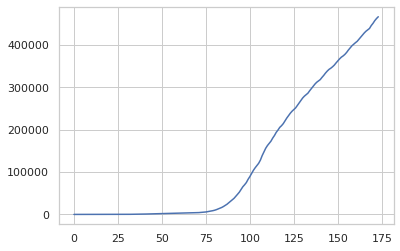

In [38]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()

podemos ver que apartir de 75 dias o numero de mortes pela covid-19 disparou no mundo.

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [42]:
#selecionando o brasil para realizar uma análise exploratoria

df_brasil = df.loc[df.location == "Brazil"].copy()

In [58]:
#analisando as 5 primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3259,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3260,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3261,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3262,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3263,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Na celula abaixo vamos ver quando ocorreu o primeiro caso aqui no brasil.

In [52]:
#selecionando o primeiro caso
df_brasil.loc[df.total_cases == 1]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3316,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3317,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.0,0.0,0.005,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3318,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.0,0.0,0.005,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3319,BRA,South America,Brazil,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


podemos ver que ocoreu no dia **26 de fevereiro de 2020**.

In [53]:
#selecionando a primeira morte
df_brasil.loc[df.total_deaths == 1]


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3337,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


A primeira morte registrada no brasil foi em **18 de março de 2020**.


In [69]:
#selecionando o total de mortes e de casos no brasil
df_btotal = df.loc[df.date == '2020-06-21', ['total_cases', 'total_deaths']].sort_values(by="total_deaths", ascending=False)

# Series Temporais Com Prophet

<center><img alt="prophet" widht="60%" src="https://miro.medium.com/max/964/0*tVCene42rgUTNv9Q.png"></center>

O **prophet** é uma ferramenta de previsão desenvolvida pelo facebook,
segue a API do modelo **sklearn**. Criamos uma instância da classe Prophet e depois chamamos seus métodos de ajuste e previsão. vamos utiliza-la abaixo para realizar uma previsão de mortes da **covid-19** aqui no Brasil.



In [81]:
#importando o prophet
from fbprophet import Prophet

In [76]:
#criando uma variável somente com o total de mortes e a data
prev = df_brasil[['date','total_deaths']]

Agora vamos renomear as colunas **date** e **total_deaths** para **ds** e **y**.

In [78]:
#renomenando as colunas
prev.columns = ["ds", "y"]

In [80]:
#Analisando as ultimas entradas
prev.tail()

,ds,y
3428,2020-06-17,45241.0
3429,2020-06-18,46510.0
3430,2020-06-19,47748.0
3431,2020-06-20,48954.0
3432,2020-06-21,49976.0


Essa conversão é necessária por conta do prophet entender somente as colunas **ds** e **y**, onde *'ds'* seria uma data e o *'y'* a previsão desejada.

## Previsão de mortes por Covid-19 no Brasil

Nossa previsão será de 40 dias que resulta no dia 31-07-2020.
Neste caso vamos ter uma confiança de 95% de acerto e 5% de erro para a previsão do modelo.

In [90]:
#instanciando a quantidade de dias até o final de julho
dias = 40

In [92]:
# treinando o modelo
m = Prophet(interval_width=0.95)
m.fit(prev)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
207,2020-07-25
208,2020-07-26
209,2020-07-27
210,2020-07-28
211,2020-07-29
212,2020-07-30
213,2020-07-31


In [86]:
# Realizando a previsão do modelo
previsao = m.predict(futuro)
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2020-06-24,52366.003487,51992.957153,52615.918787,52245.077757,52505.884796,-58.677315,-58.677315,-58.677315,-58.677315,-58.677315,-58.677315,0.0,0.0,0.0,52307.326172
177,2020-06-25,53349.350122,53001.915802,53711.345825,53165.863361,53575.604785,-14.141852,-14.141852,-14.141852,-14.141852,-14.141852,-14.141852,0.0,0.0,0.0,53335.208270
178,2020-06-26,54332.696757,54019.095918,54758.394395,54067.166548,54648.015453,58.965980,58.965980,58.965980,58.965980,58.965980,58.965980,0.0,0.0,0.0,54391.662737
179,2020-06-27,55316.043392,54982.945777,55900.433323,54959.966671,55720.565583,90.957705,90.957705,90.957705,90.957705,90.957705,90.957705,0.0,0.0,0.0,55407.001097
180,2020-06-28,56299.390027,55873.016500,56992.940339,55842.233565,56788.004069,92.065090,92.065090,92.065090,92.065090,92.065090,92.065090,0.0,0.0,0.0,56391.455117


O **Prophet** realiza 3 previsões em cima dos dados informados, **yhat_lower** corresponde a previsão baixa, **yhat** corresponde a previsão media e o **yhat_upper** corresponde a previsão alta.

In [91]:
#Verificando os ultimos 40 dias previstos
previsao[['ds','yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
141,2020-05-20,17610.423374,17890.193953,18184.366075
142,2020-05-21,18634.502271,18918.076052,19189.201509
143,2020-05-22,19703.346413,19974.530518,20249.849204
144,2020-05-23,20726.675889,20989.868879,21272.182782
145,2020-05-24,21691.061642,21974.322898,22266.908787
146,2020-05-25,22549.625054,22821.540331,23088.495605
147,2020-05-26,23441.214077,23723.845582,23988.752834
148,2020-05-27,24483.524581,24773.620397,25047.950101
149,2020-05-28,25509.029322,25801.502495,26068.806897
150,2020-05-29,26587.895464,26857.956962,27129.488643


Segundo o **Prophet** a tendência de mortes no Brasil para o final de julho é de:

*   **55.873** mortes para baixa
*   **56.391** mortes para media
*   **56.992** mortes para alta



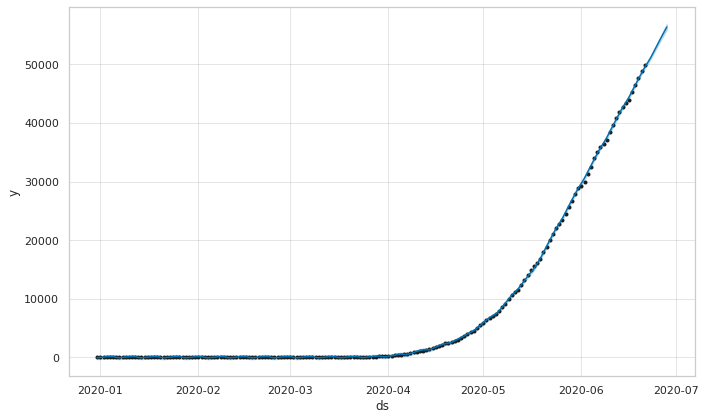

In [93]:
#plotando a previsão
confirmed_forecast_plot = m.plot(previsao)

Com o grafico plotado podemos ver que a linha de tendencia do prophet caminha junto com a dos dados originais onde:

*   **Bolinha preta:** linha dos dados reais
*   **Linha Azul:**previsão do prophet

Segundo a previsão do Prophet estima-se que no Brasil no final de julho podemos chegar a **56.992** mortes por covid-19.



## Conclusão

Segundo nossa análise, a **covid-19** se evolui muito rapido, e com isso o numero de infectados e de mortes tendem a subir muito, utilizamos o *prophet(uma ferramenta do facebook)* de seríes temporais para realizar uma previsão dos dados sobre o Brasil, os resultados obtidos não foram muitos positivos, a linha de previsão do prophet percorreu praticamente todos os 40 dias que definimos para a previsão até o final de julho com a linha dos dados originais, e com isso a previsão resultou em **56.992 mortes** até o final de julho.


### Importante
**Essa análise foi feita somente para fins estudantis.**